# <font color='red'>Implement SGD Classifier with Logloss and L2 regularization Using SGD without using sklearn</font>

**There will be some functions that start with the word "grader" ex: grader_weights(), grader_sigmoid(), grader_logloss() etc, you should not change those function definition.<br><br>Every Grader function has to return True.**

<font color='red'> Importing packages</font>

In [1]:
import numpy as np
import pandas as pd
import math
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import linear_model

<font color='red'>Creating custom dataset</font>

In [2]:
# please don't change random_state
X, y = make_classification(n_samples=50000, n_features=15, n_informative=10, n_redundant=5,
                           n_classes=2, weights=[0.6], class_sep=0.7, random_state=42)
# make_classification is used to create custom dataset 
# Please check this link (https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_classification.html) for more details

In [3]:
X.shape, y.shape

((50000, 15), (50000,))

<font color='red'>Splitting data into train and test </font>

In [4]:
#please don't change random state
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [5]:
# Standardizing the data.
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [6]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((37500, 15), (37500,), (12500, 15), (12500,))

# <font color='red' size=5>SGD classifier</font>

In [7]:
# alpha : float
# Constant that multiplies the regularization term. 

# eta0 : double
# The initial learning rate for the ‘constant’, ‘invscaling’ or ‘adaptive’ schedules.

clf = linear_model.SGDClassifier(eta0=0.0001, alpha=0.0001, loss='log', random_state=15, penalty='l2', tol=1e-3, verbose=2, learning_rate='constant')
clf
# Please check this documentation (https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html) 

SGDClassifier(eta0=0.0001, learning_rate='constant', loss='log',
              random_state=15, verbose=2)

In [8]:
clf.fit(X=X_train, y=y_train) # fitting our model

-- Epoch 1
Norm: 0.61, NNZs: 15, Bias: -0.250328, T: 37500, Avg. loss: 0.592502
Total training time: 0.01 seconds.
-- Epoch 2
Norm: 0.82, NNZs: 15, Bias: -0.369630, T: 75000, Avg. loss: 0.541622
Total training time: 0.02 seconds.
-- Epoch 3
Norm: 0.92, NNZs: 15, Bias: -0.431641, T: 112500, Avg. loss: 0.532164
Total training time: 0.03 seconds.
-- Epoch 4
Norm: 0.98, NNZs: 15, Bias: -0.468398, T: 150000, Avg. loss: 0.529071
Total training time: 0.04 seconds.
-- Epoch 5
Norm: 1.02, NNZs: 15, Bias: -0.489412, T: 187500, Avg. loss: 0.527902
Total training time: 0.05 seconds.
-- Epoch 6
Norm: 1.05, NNZs: 15, Bias: -0.499685, T: 225000, Avg. loss: 0.527340
Total training time: 0.05 seconds.
-- Epoch 7
Norm: 1.07, NNZs: 15, Bias: -0.506118, T: 262500, Avg. loss: 0.527130
Total training time: 0.06 seconds.
-- Epoch 8
Norm: 1.08, NNZs: 15, Bias: -0.512639, T: 300000, Avg. loss: 0.526993
Total training time: 0.07 seconds.
-- Epoch 9
Norm: 1.09, NNZs: 15, Bias: -0.512699, T: 337500, Avg. loss: 0.

SGDClassifier(eta0=0.0001, learning_rate='constant', loss='log',
              random_state=15, verbose=2)

In [9]:
sklearn_coef = clf.coef_
sklearn_intercept = clf.intercept_
clf.coef_, clf.coef_.shape, clf.intercept_
#clf.coef_ will return the weights
#clf.coef_.shape will return the shape of weights
#clf.intercept_ will return the intercept term

(array([[ 0.15849275,  0.27600431, -0.06716027,  0.02780819,  0.10935144,
          0.10730814, -0.67854728,  0.03694831, -0.53966481, -0.26110789,
          0.05822099, -0.08086551, -0.05879137, -0.06834894,  0.48839778]]),
 (1, 15),
 array([-0.51546303]))



```
# This is formatted as code
```

## <font color='red' size=5> Implement Logistic Regression with L2 regularization Using SGD: without using sklearn </font>






1.  We will be giving you some functions, please write code in that functions only.

2.  After every function, we will be giving you expected output, please make sure that you get that output. 






<br>

* Initialize the weight_vector and intercept term to zeros (Write your code in <font color='blue'>def initialize_weights()</font>)

* Create a loss function (Write your code in <font color='blue'>def logloss()</font>) 

 $log loss = -1*\frac{1}{n}\Sigma_{for each Yt,Y_{pred}}(Ytlog10(Y_{pred})+(1-Yt)log10(1-Y_{pred}))$
- for each epoch:

    - for each batch of data points in train: (keep batch size=1)

        - calculate the gradient of loss function w.r.t each weight in weight vector (write your code in <font color='blue'>def gradient_dw()</font>)

        $dw^{(t)} = x_n(y_n − σ((w^{(t)})^{T} x_n+b^{t}))- \frac{λ}{N}w^{(t)})$ <br>

        - Calculate the gradient of the intercept (write your code in <font color='blue'> def gradient_db()</font>) <a href='https://drive.google.com/file/d/1nQ08-XY4zvOLzRX-lGf8EYB5arb7-m1H/view?usp=sharing'>check this</a>

           $ db^{(t)} = y_n- σ((w^{(t)})^{T} x_n+b^{t}))$

        - Update weights and intercept (check the equation number 32 in the above mentioned <a href='https://drive.google.com/file/d/1nQ08-XY4zvOLzRX-lGf8EYB5arb7-m1H/view?usp=sharing'>pdf</a>): <br>
        $w^{(t+1)}← w^{(t)}+α(dw^{(t)}) $<br>

        $b^{(t+1)}←b^{(t)}+α(db^{(t)}) $
    - calculate the log loss for train and test with the updated weights (you can check the python assignment 10th question)
    - And if you wish, you can compare the previous loss and the current loss, if it is not updating, then
        you can stop the training
    - append this loss in the list ( this will be used to see how loss is changing for each epoch after the training is over )


### <font color='blue'>Initialize weights </font>

In [10]:
def initialize_weights(dim):
    ''' In this function, we will initialize our weights and bias'''
    #initialize the weights to zeros array of (1,dim) dimensions
    #you use zeros_like function to initialize zero, check this link https://docs.scipy.org/doc/numpy/reference/generated/numpy.zeros_like.html
    #initialize bias to zero
    w = np.zeros_like(dim)
    b = 0
    return w,b

In [11]:
dim=X_train[0] 
w,b = initialize_weights(dim)
print('w =',(w))
print('b =',str(b))

w = [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
b = 0


### <font color='cyan'>Grader function - 1 </font>

In [12]:
dim=X_train[0] 
w,b = initialize_weights(dim)
def grader_weights(w,b):
  assert((len(w)==len(dim)) and b==0 and np.sum(w)==0.0)
  return True
grader_weights(w,b)

True

### <font color='blue'>Compute sigmoid </font>

$sigmoid(z)= 1/(1+exp(-z))$

In [13]:
def sigmoid(z):
    ''' In this function, we will return sigmoid of z'''
    # compute sigmoid(z) and return
    a = 1/(1+np.exp(-z))
    return a

### <font color='cyan'>Grader function - 2</font>

In [14]:
def grader_sigmoid(z):
  val=sigmoid(z)
  assert(val==0.8807970779778823)
  return True
grader_sigmoid(2)

True

### <font color='blue'> Compute loss </font>

$log loss = -1*\frac{1}{n}\Sigma_{for each Yt,Y_{pred}}(Ytlog10(Y_{pred})+(1-Yt)log10(1-Y_{pred}))$

In [15]:
def logloss(y_true,y_pred):
    '''In this function, we will compute log loss '''
    s = 0
    for i in range(len(y_true)):
        s = s+( y_true[i]*np.log10(y_pred[i])+(1-y_true[i])*np.log10(1-y_pred[i]) )
    loss = s*(-1/len(y_true))
    return loss

### <font color='cyan'>Grader function - 3 </font>

In [16]:
def grader_logloss(true,pred):
  loss=logloss(true,pred)
  assert(loss==0.07644900402910389)
  return True
true=[1,1,0,1,0]
pred=[0.9,0.8,0.1,0.8,0.2]
grader_logloss(true,pred)

True

### <font color='blue'>Compute gradient w.r.to  'w' </font>

$dw^{(t)} = x_n(y_n − σ((w^{(t)})^{T} x_n+b^{t}))- \frac{λ}{N}w^{(t)}$ <br>

In [17]:
def gradient_dw(x,y,w,b,alpha,N):
    '''In this function, we will compute the gardient w.r.to w '''
    dw = x*(y - sigmoid(np.dot(w.T,x)+b)- (alpha/N)*w )
    return dw

### <font color='cyan'>Grader function - 4 </font>

In [18]:
def grader_dw(x,y,w,b,alpha,N):
  grad_dw=gradient_dw(x,y,w,b,alpha,N)
  assert(np.sum(grad_dw)==2.613689585)
  return True
grad_x=np.array([-2.07864835,  3.31604252, -0.79104357, -3.87045546, -1.14783286,
       -2.81434437, -0.86771071, -0.04073287,  0.84827878,  1.99451725,
        3.67152472,  0.01451875,  2.01062888,  0.07373904, -5.54586092])
grad_y=0
grad_w,grad_b=initialize_weights(grad_x)
alpha=0.0001
N=len(X_train)
grader_dw(grad_x,grad_y,grad_w,grad_b,alpha,N)

True

### <font color='blue'>Compute gradient w.r.to 'b' </font>

$ db^{(t)} = y_n- σ((w^{(t)})^{T} x_n+b^{t})$

In [19]:
 def gradient_db(x,y,w,b):
     '''In this function, we will compute gradient w.r.to b '''
     db = y - sigmoid(np.dot(w.T,x) + b)
     return db

### <font color='cyan'>Grader function - 5 </font>

In [20]:
def grader_db(x,y,w,b):
  grad_db=gradient_db(x,y,w,b)
  assert(grad_db==-0.5)
  return True
grad_x=np.array([-2.07864835,  3.31604252, -0.79104357, -3.87045546, -1.14783286,
       -2.81434437, -0.86771071, -0.04073287,  0.84827878,  1.99451725,
        3.67152472,  0.01451875,  2.01062888,  0.07373904, -5.54586092])
grad_y=0
grad_w,grad_b=initialize_weights(grad_x)
alpha=0.0001
N=len(X_train)
grader_db(grad_x,grad_y,grad_w,grad_b)

True

### <font color='blue'> Implementing logistic regression</font>

In [21]:
from datetime import datetime

def train(X_train,y_train,X_test,y_test,epochs,alpha,eta0):
    ''' In this function, we will implement logistic regression'''
    start_time = datetime.now()
    #Here eta0 is learning rate
    #implement the code as follows
    # initalize the weights (call the initialize_weights(X_train[0]) function)
    # for every epoch
        # for every data point(X_train,y_train)
           #compute gradient w.r.to w (call the gradient_dw() function)
           #compute gradient w.r.to b (call the gradient_db() function)
           #update w, b
        # predict the output of x_train[for all data points in X_train] using w,b
        #compute the loss between predicted and actual values (call the loss function)
        # store all the train loss values in a list
        # predict the output of x_test[for all data points in X_test] using w,b
        #compute the loss between predicted and actual values (call the loss function)
        # store all the test loss values in a list
        # you can also compare previous loss and current loss, if loss is not updating then stop the process and return w,b
    w,b = initialize_weights(dim=X_train[0])
    train_loss = []    #train loss stored for each epoch
    test_loss = []     #test loss stored for each epoch
    
    for i in range(epochs):
        ytrain_pred = []          #train data predicted output here
        ytest_pred = []           #test data predeicted output here
        
        for j in range(len(X_train)):  #iterate over each data point in training set
            dw = gradient_dw(X_train[j], y_train[j], w, b, alpha, N=len(X_train))   #find the gradiet w.r.t w
            db = gradient_db(X_train[j], y_train[j], w, b)                          #find gradient w.r.t b
            w += eta0*dw          #updating w and b
            b += eta0*db
            
        for k in range(len(X_train)):
            z_train = np.dot(w,X_train[k]) + b
            ytrain_pred.append(sigmoid(z_train))   #prediction on training data
        tr_loss = logloss(y_train, ytrain_pred)    #training logloss
        train_loss.append(tr_loss)
        
        for l in range(len(X_test)):
            z_test = np.dot(w,X_test[l]) + b
            ytest_pred .append(sigmoid(z_test))   #prediction on test data
        te_loss = logloss(y_test, ytest_pred)     #test logloss
        test_loss.append(te_loss)
        
        avg_loss = (tr_loss+te_loss)/2            #average logloss (avg for training and test logloss)
        pre_loss = (train_loss[i-1] + test_loss[i-1])/2   #previos iteration logloss
        
        print('Epoch number: {}'.format(i+1))
        print('\tPrev. loss: {}'.format(pre_loss))
        print('\tAvg. loss: {}'.format(avg_loss))
        
        if i >= 1 and pre_loss < avg_loss :           #ponit at which prev. logloss becomes less than current, stop the training
            end_time = datetime.now()
            total_elapsed = (end_time-start_time).total_seconds()
            print('\nConvergence after {} epochs took {} seconds'.format(i+1,total_elapsed))
            last_epoch = i+1
            break
    else:
        end_time = datetime.now()                      #if not converges withing given epoch no. run till last and converge there only
        total_elapsed = (end_time-start_time).total_seconds()
        last_epoch = i+1
        print('Convergence after {} epochs took {} seconds'.format(i+1,total_elapsed))
    return w,b,last_epoch,train_loss,test_loss              #return last w, b, all training logloss list and test logloss list.

In [22]:
alpha=0.0001
eta0=0.0001
N=len(X_train)
epochs=50
w,b,last_epoch,train_loss,test_loss=train(X_train,y_train,X_test,y_test,epochs,alpha,eta0)
print('\ntrain_loss: ', train_loss)
print('test_loss: ',test_loss)

Epoch number: 1
	Prev. loss: 0.24046108482797846
	Avg. loss: 0.24046108482797846
Epoch number: 2
	Prev. loss: 0.24046108482797846
	Avg. loss: 0.23315075123040757
Epoch number: 3
	Prev. loss: 0.23315075123040757
	Avg. loss: 0.23104572569548656
Epoch number: 4
	Prev. loss: 0.23104572569548656
	Avg. loss: 0.2302475631449999
Epoch number: 5
	Prev. loss: 0.2302475631449999
	Avg. loss: 0.2298931918649711
Epoch number: 6
	Prev. loss: 0.2298931918649711
	Avg. loss: 0.2297182276819303
Epoch number: 7
	Prev. loss: 0.2297182276819303
	Avg. loss: 0.22962497446267655
Epoch number: 8
	Prev. loss: 0.22962497446267655
	Avg. loss: 0.22957229293823386
Epoch number: 9
	Prev. loss: 0.22957229293823386
	Avg. loss: 0.22954110870604094
Epoch number: 10
	Prev. loss: 0.22954110870604094
	Avg. loss: 0.22952191439874797
Epoch number: 11
	Prev. loss: 0.22952191439874797
	Avg. loss: 0.22950969932087265
Epoch number: 12
	Prev. loss: 0.22950969932087265
	Avg. loss: 0.22950170085562543
Epoch number: 13
	Prev. loss: 0

### <font color='red'>Goal of assignment</font>

Compare your implementation and SGDClassifier's the weights and intercept, make sure they are as close as possible i.e difference should be in terms of 10^-3

* custom implemented SGD co-efficients and intercept are w and b repectively

In [23]:
sgd_coeff = w
sgd_intercept = b
last_epoch

50

In [24]:
# these are the results we got after we implemented sgd and found the optimal weights and intercept
print('sgd_coeff: ', sgd_coeff)
print('sgd_intercept: ', sgd_intercept)

sgd_coeff:  [ 0.15228923  0.28121234 -0.06608146  0.03628022  0.11175928  0.11129544
 -0.68954286  0.03640683 -0.543305   -0.2622987   0.06887824 -0.07691218
 -0.06177126 -0.06948261  0.50296224]
sgd_intercept:  -0.5163804917458794


### <font color='cyan'> Coefficients difference: custom - sklearn co-eff </font>

In [25]:
coeff_diff = (sgd_coeff - sklearn_coef)
coeff_diff

array([[-0.00620351,  0.00520803,  0.00107882,  0.00847203,  0.00240784,
         0.00398731, -0.01099558, -0.00054148, -0.00364019, -0.00119081,
         0.01065726,  0.00395333, -0.0029799 , -0.00113366,  0.01456446]])

In [26]:
data ={'sklearn_coeff':sklearn_coef[0],'sgd implemented coeff': w, 'difference':coeff_diff[0]}

In [27]:
df1 = pd.DataFrame(data)
df1

,sklearn_coeff,sgd implemented coeff,difference
0,0.158493,0.152289,-0.006204
1,0.276004,0.281212,0.005208
2,-0.067160,-0.066081,0.001079
3,0.027808,0.036280,0.008472
4,0.109351,0.111759,0.002408
5,0.107308,0.111295,0.003987
6,-0.678547,-0.689543,-0.010996
7,0.036948,0.036407,-0.000541
8,-0.539665,-0.543305,-0.003640
9,-0.261108,-0.262299,-0.001191


#### Both Intercepts, custom and sklearn implementation

In [28]:
data2 = {'sklearn_intercept':sklearn_intercept, 'sgd_intercept':sgd_intercept}
df2 = pd.DataFrame(data2)
df2

,sklearn_intercept,sgd_intercept
0,-0.515463,-0.51638


### <font color='blue'>Plot epoch number vs train , test loss </font>

* epoch number on X-axis
* loss on Y-axis

<function matplotlib.pyplot.show(close=None, block=None)>

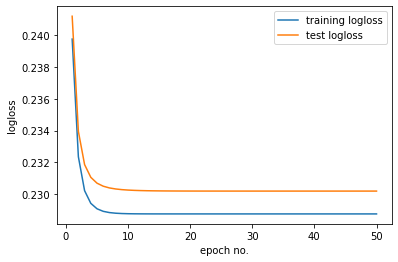

In [29]:
from matplotlib import pyplot as plt
epoch = [i for i in range(1,last_epoch+1)]

plt.plot(epoch,train_loss , label='training logloss')
plt.plot(epoch,test_loss, label='test logloss')
plt.xlabel("epoch no.")
plt.ylabel("logloss")
plt.legend()
plt.show

### <font color='red'> Prediction using Logistic concept, train and test accuracies </font>

In [30]:
def pred(w,b, X):
    N = len(X)
    predict = []
    for i in range(N):
        z=np.dot(w,X[i])+b
        if sigmoid(z) >= 0.5: # sigmoid(w,x,b) returns 1/(1+exp(-(dot(x,w)+b)))
            predict.append(1)
        else:
            predict.append(0)
    return np.array(predict)
print(1-np.sum(y_train - pred(w,b,X_train))/len(X_train))
print(1-np.sum(y_test  - pred(w,b,X_test))/len(X_test))

0.9318666666666666
0.92672


* Conclusion : Train and Test accuracies yeilds good percentage values.

* Note: I have used make_classification function with these values : "weights=[0.6], class_sep=0.7, random_state=42" .
* Out of 15 coefficients 12 are in the 10^-3 range. 
* Below is the result I'm getting. But still it is running till 50 epoch no.s.
* Took confirmation from team, they said go ahead and submit the results

## END